In [222]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt   

In [223]:
yolo = cv2.dnn.readNet("/home/saber/Desktop/Object Detection/yolov3.weights","/home/saber/Desktop/Object Detection/yolov3.cfg")

In [224]:
classes = []

with open("./coco.names","r") as f:
  classes = f.read().splitlines()

In [225]:
img = cv2.imread("/home/saber/Downloads/Dog.jpg")
blob = cv2.dnn.blobFromImage(img, 1/255,(320,320),(0,0,0), swapRB=True, crop=False)

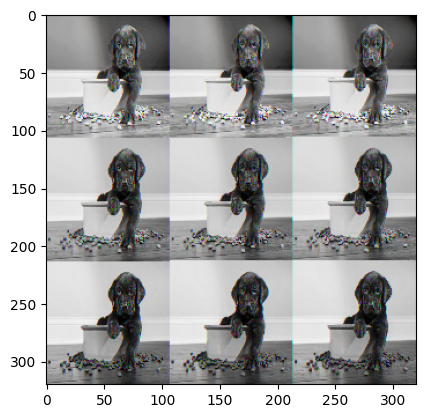

In [226]:
#print image 
i= blob[0].reshape(320,320,3)
plt.imshow(i)
plt.show()

In [227]:
blob.shape

(1, 3, 320, 320)

In [228]:
yolo.setInput(blob)

In [229]:
output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)

In [230]:
boxes = []
confidences = []
class_ids = [] 

width=2000 
height=1200

for output in layeroutput : 
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.9:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w =center_x = int(detection[0]*width)
      h = int(detection[0]*height)


      x = int(center_x- w/2)
      y = int(center_y- h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
      

In [217]:
len(boxes)

1

In [231]:
indexes =cv2.dnn.NMSBoxes(boxes, confidences,0.5,0.4)

In [232]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size=(len(boxes),3))

In [233]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]

  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i], 2))
  color = colors[i]

  cv2.rectangle(img, (x,y), (x+w, y+h), color, 1)
  cv2.putText(img, label+""+confi, (x,y+20),font,10,(0,0,250),5)

img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


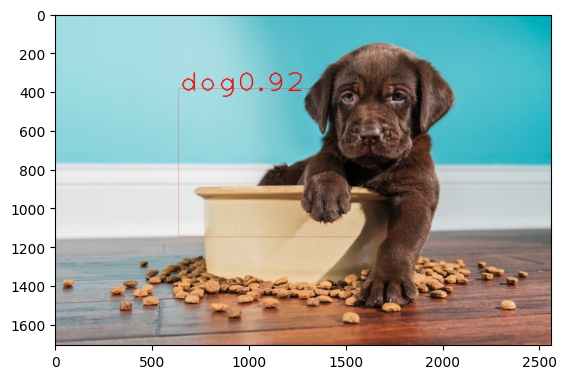

In [234]:
plt.imshow(img)
plt.show()